In [39]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
# Read the data from the CSV file
file_path = '../Data File Repository/Yearly_Median_Rent_DF.csv'
df = pd.read_csv(file_path)

In [44]:
df.columns = ['Borough'] + list(map(str, range(2010, 2024)))



In [45]:
# Convert values to float and remove $ signs
for year in df.columns[1:]:
    df[year] = df[year].replace('[\$,]', '', regex=True).astype(float)


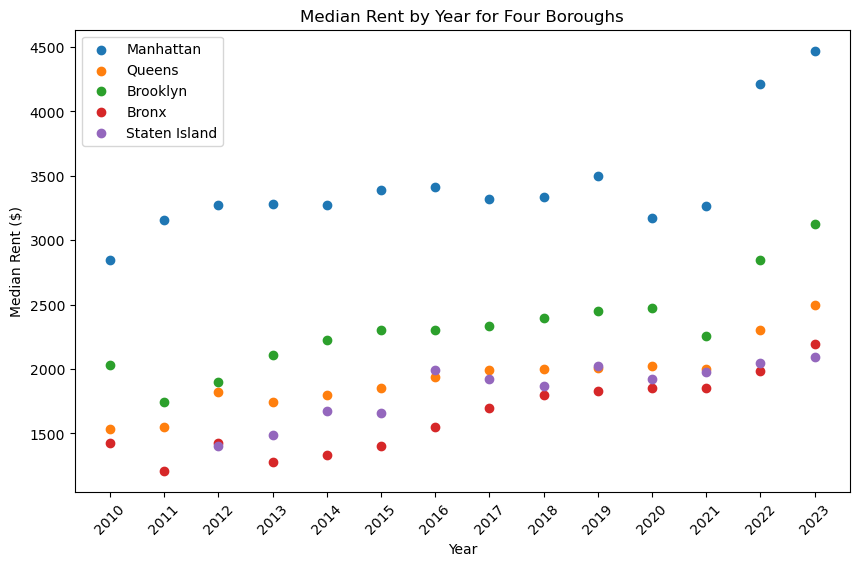

In [59]:
# create the plot
plt.figure(figsize=(10, 6))

for borough in df['Borough'].unique()[:5]:  # Take the first four boroughs
    borough_data = df[df['Borough'] == borough]
    years = borough_data.columns[1:]
    rents = borough_data.iloc[0, 1:]
    plt.scatter(years, rents, label=borough)

plt.xlabel('Year')
plt.ylabel('Median Rent ($)')
plt.title('Median Rent by Year for Four Boroughs')
plt.legend()
plt.xticks(rotation=45)
plt.show()